### World Population & Forecast Dataset (1955-2050)

- Projeto iniciado com o objetivo de estimar a densidade urbana prevista baseado na variavel de taxa de fertilidade.


### Importacao das bibliotecas e Bases de dados

In [2]:
import pandas as pd 
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn.objects as so
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

- Verificado que a base de dados estava separada por pais, entao foi feito o procedimento de condesacao das bases de dados em um data frame

In [3]:
base_population = pd.DataFrame()
caminho_bases = pathlib.Path('population\countries')

for arquivo in caminho_bases.iterdir():
    
    df = pd.read_csv(caminho_bases / arquivo.name)
    base_population = base_population.append(df)

display (base_population)

C:\Users\abner\AppData\Local\Temp\ipykernel_17060\116308332.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_population = base_population.append(df)
C:\Users\abner\AppData\Local\Temp\ipykernel_17060\116308332.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_population = base_population.append(df)
C:\Users\abner\AppData\Local\Temp\ipykernel_17060\116308332.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_population = base_population.append(df)
C:\Users\abner\AppData\Local\Temp\ipykernel_17060\116308332.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base_population = base_population.append(df)
C:\Users\abner\A

,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,Rank
0,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,25.4 %,9904337,0.50 %,7794798739,37
1,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,25.2 %,9582625,0.49 %,7713468100,37
2,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,24.9 %,9273302,0.49 %,7631091040,38
3,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,24.7 %,8971472,0.48 %,7547858925,39
4,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,24.5 %,8670939,0.47 %,7464022049,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,Zimbabwe,1975,6293875,3.54 %,200914,-9109.0,15.4,7.40,16,19.3 %,1215331,0.15 %,4079480606,79
14,Zimbabwe,1970,5289303,3.42 %,163625,-8400.0,15.6,7.40,14,17.0 %,898584,0.14 %,3700437046,79
15,Zimbabwe,1965,4471177,3.43 %,138899,-3002.0,16.0,7.30,12,14.4 %,644767,0.13 %,3339583597,91
16,Zimbabwe,1960,3776681,3.28 %,112679,-1501.0,17.2,7.00,10,12.5 %,472478,0.12 %,3034949748,87


- Exclusao das linhas que contenham informacoes em branco

In [4]:
base_population.dropna(inplace=True)

In [5]:
base_population.set_index('Urban  Pop %', inplace=True)
base_population = base_population.drop(axis=0, index='N.A.')
base_population.reset_index(inplace=True)

base_population

,Urban Pop %,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Population,Country's Share of World Pop,World Population,Rank
0,25.4 %,Afghanistan,2020,38928346,2.33 %,886592,-62920.0,18.4,4.56,60,9904337,0.50 %,7794798739,37
1,25.2 %,Afghanistan,2019,38041754,2.34 %,869833,-62920.0,17.4,5.26,58,9582625,0.49 %,7713468100,37
2,24.9 %,Afghanistan,2018,37171921,2.41 %,875808,-62920.0,17.4,5.26,57,9273302,0.49 %,7631091040,38
3,24.7 %,Afghanistan,2017,36296113,2.58 %,913081,-62920.0,17.4,5.26,56,8971472,0.48 %,7547858925,39
4,24.5 %,Afghanistan,2016,35383032,2.82 %,969429,-62920.0,17.4,5.26,54,8670939,0.47 %,7464022049,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,19.3 %,Zimbabwe,1975,6293875,3.54 %,200914,-9109.0,15.4,7.40,16,1215331,0.15 %,4079480606,79
3566,17.0 %,Zimbabwe,1970,5289303,3.42 %,163625,-8400.0,15.6,7.40,14,898584,0.14 %,3700437046,79
3567,14.4 %,Zimbabwe,1965,4471177,3.43 %,138899,-3002.0,16.0,7.30,12,644767,0.13 %,3339583597,91
3568,12.5 %,Zimbabwe,1960,3776681,3.28 %,112679,-1501.0,17.2,7.00,10,472478,0.12 %,3034949748,87


- Verificacao dos tipos dos dados em cada coluna e em seguida foi transformacao dos mesmos em numerico

In [6]:
print(base_population.dtypes)

Urban  Pop %                      object
country                           object
Year                               int64
Population                         int64
Yearly %   Change                 object
Yearly  Change                     int64
Migrants (net)                   float64
Median Age                       float64
Fertility Rate                   float64
Density (P/Km²)                    int64
Urban Population                  object
Country's Share of  World Pop     object
World Population                   int64
Rank                               int64
dtype: object


In [7]:
base_population['Urban  Pop %'] = base_population['Urban  Pop %'].str.replace('%','')
base_population['Yearly %   Change'] = base_population['Yearly %   Change'].str.replace('%','')
base_population["Country's Share of  World Pop"] = base_population["Country's Share of  World Pop"].str.replace('%','')

base_population['Urban  Pop %'] = base_population['Urban  Pop %'].astype(np.float32) /100
base_population['Yearly %   Change'] = base_population['Yearly %   Change'].astype(np.float32) /100
base_population["Country's Share of  World Pop"] = base_population["Country's Share of  World Pop"].astype(np.float32) /100
base_population["Urban Population"] = base_population["Urban Population"].astype(np.int64) /100

display(base_population)    

,Urban Pop %,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Population,Country's Share of World Pop,World Population,Rank
0,0.254,Afghanistan,2020,38928346,0.0233,886592,-62920.0,18.4,4.56,60,99043.37,0.0050,7794798739,37
1,0.252,Afghanistan,2019,38041754,0.0234,869833,-62920.0,17.4,5.26,58,95826.25,0.0049,7713468100,37
2,0.249,Afghanistan,2018,37171921,0.0241,875808,-62920.0,17.4,5.26,57,92733.02,0.0049,7631091040,38
3,0.247,Afghanistan,2017,36296113,0.0258,913081,-62920.0,17.4,5.26,56,89714.72,0.0048,7547858925,39
4,0.245,Afghanistan,2016,35383032,0.0282,969429,-62920.0,17.4,5.26,54,86709.39,0.0047,7464022049,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3565,0.193,Zimbabwe,1975,6293875,0.0354,200914,-9109.0,15.4,7.40,16,12153.31,0.0015,4079480606,79
3566,0.170,Zimbabwe,1970,5289303,0.0342,163625,-8400.0,15.6,7.40,14,8985.84,0.0014,3700437046,79
3567,0.144,Zimbabwe,1965,4471177,0.0343,138899,-3002.0,16.0,7.30,12,6447.67,0.0013,3339583597,91
3568,0.125,Zimbabwe,1960,3776681,0.0328,112679,-1501.0,17.2,7.00,10,4724.78,0.0012,3034949748,87


In [8]:
df_agrupado = 0
df_agrupado2 = 0 
lista = []

df_agrupado = base_population.loc[base_population['Year']==2020,:]
df_agrupado = df_agrupado.sort_values(by=['Fertility Rate'],ascending=True)
lista = df_agrupado.iloc[0:6,1].to_list()
df_agrupado2 = base_population.loc[base_population['country'].isin(lista),:]
df_agrupado2

,Urban Pop %,country,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Population,Country's Share of World Pop,World Population,Rank
378,0.523,Bosnia And Herzegovina,2020,3280819,-0.0061,-20181,-21585.0,43.1,1.27,64,17148.10,0.0004,7794798739,135
379,0.516,Bosnia And Herzegovina,2019,3301000,-0.0069,-22925,-21585.0,41.2,1.31,65,17027.89,0.0004,7713468100,135
380,0.509,Bosnia And Herzegovina,2018,3323925,-0.0082,-27600,-21585.0,41.2,1.31,65,16902.95,0.0004,7631091040,135
381,0.501,Bosnia And Herzegovina,2017,3351525,-0.0103,-34741,-21585.0,41.2,1.31,66,16790.11,0.0004,7547858925,135
382,0.494,Bosnia And Herzegovina,2016,3386266,-0.0126,-43095,-21585.0,41.2,1.31,66,16711.35,0.0005,7464022049,134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,0.392,Taiwan,1975,16464927,0.0198,308094,-5000.0,20.8,3.33,465,64580.27,0.0040,4079480606,36
3118,0.359,Taiwan,1970,14924455,0.0296,404660,70298.0,18.9,4.38,421,53606.07,0.0040,3700437046,35
3119,0.332,Taiwan,1965,12901155,0.0347,405001,50176.0,17.8,5.41,364,42828.04,0.0039,3339583597,41
3120,0.309,Taiwan,1960,10876150,0.0343,337236,1000.0,17.5,6.14,307,33616.18,0.0036,3034949748,38


- Novamente apesar de nao utilizarmos a coluna de descricao dos paises na nossa analise estatistica, seria relevando analisar os seis princiais paises que apresentaram queda na taxa de fertilidade.

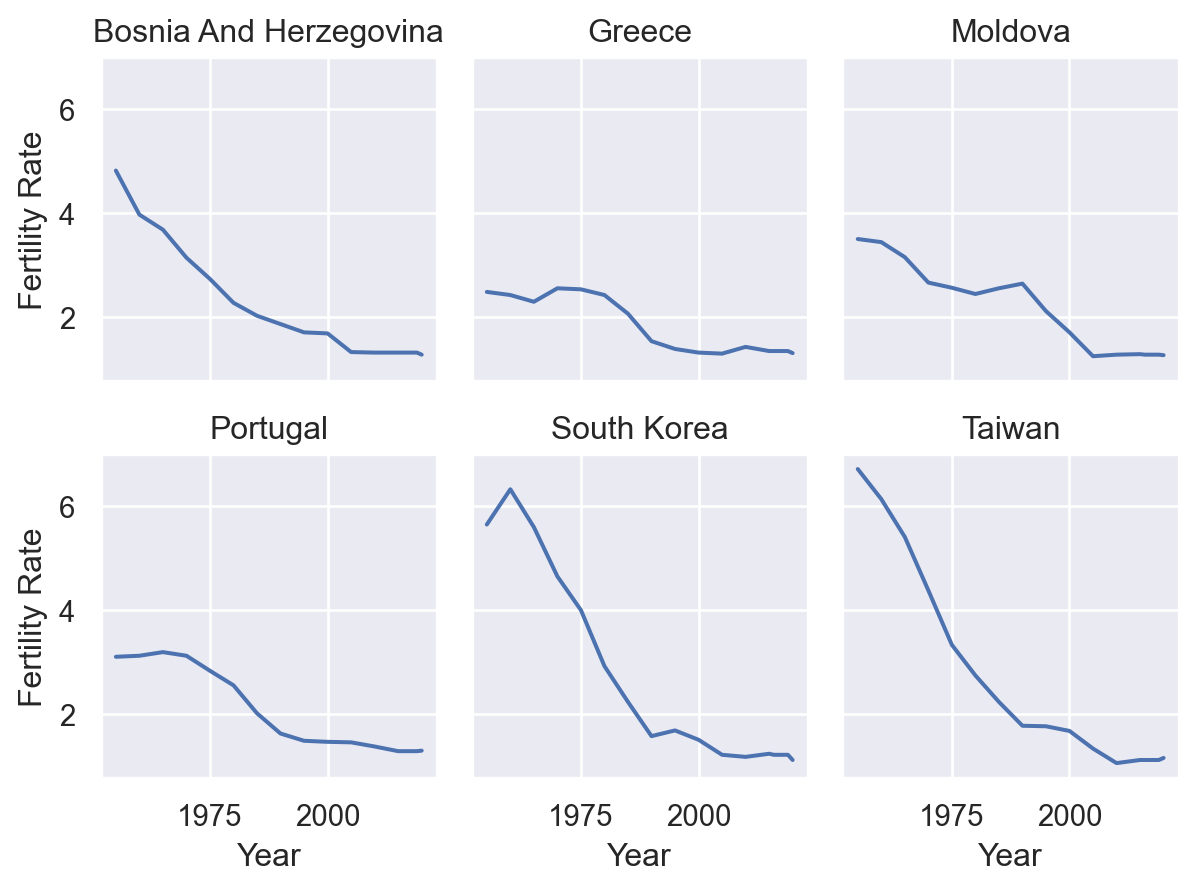

In [9]:
so.Plot(df_agrupado2, x="Year", y="Fertility Rate").facet(col="country", wrap=3).add(so.Line())

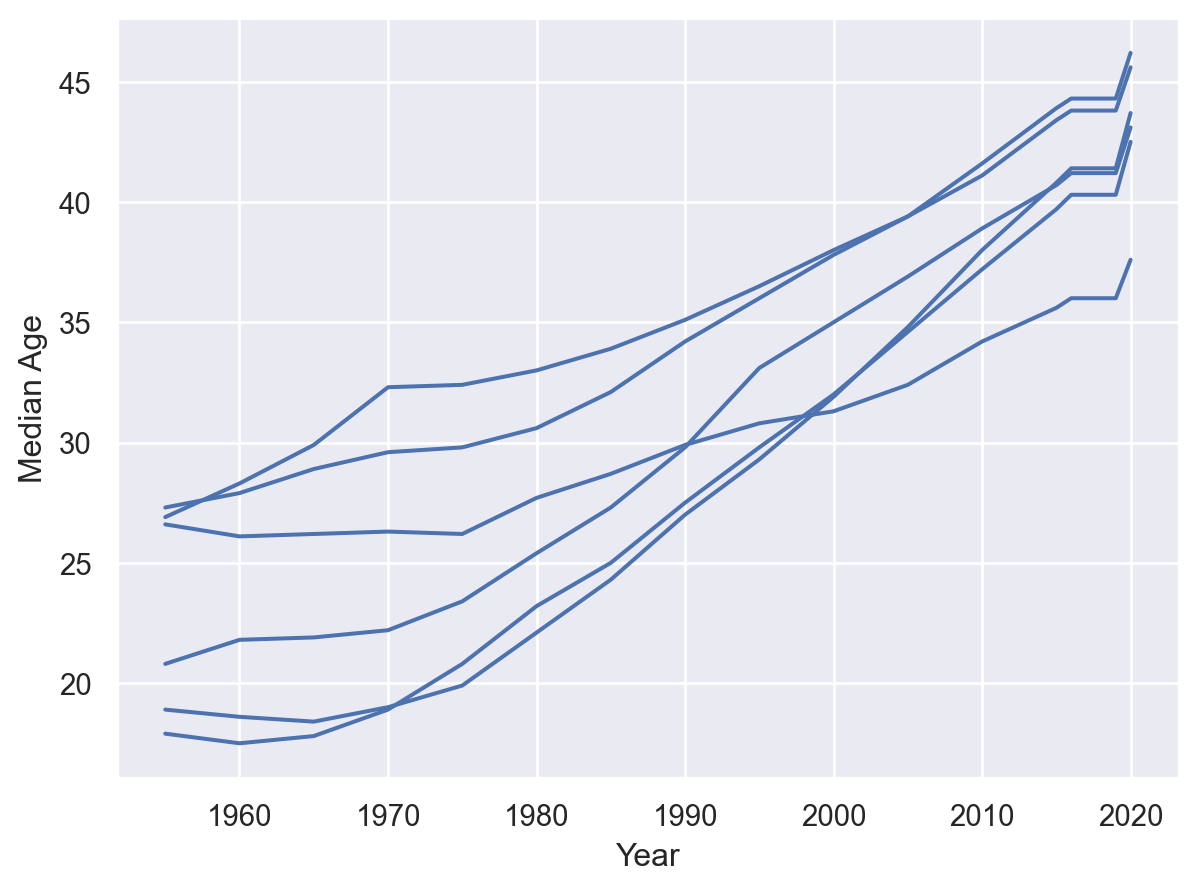

In [10]:
so.Plot(df_agrupado2, x="Year", y='Median Age',group='country').add(so.Line())

- A coluna "Rank" sera excluida do modelo pois e uma classificacao arbitraria da base de dados, onde nao ira agregar informacoes relevantes ao modelo
- A coluna de paises sera excluida pois a analise nao se propoe a realizar uma analise plitica/ geografica, visto que sera realizado testes estatisticos levando em conta dados numericos objetivos, apesar de gerarmos mais a frente a titulo de visualicao geral, graficos com a taxa de fetilidade de alguns paises.

In [11]:
base_population.drop('Rank',axis=1,inplace=True)
base_population.drop('country',axis=1,inplace=True)

- A base de dados sera tratada sera salva em csv para novas analises futuras

In [12]:
base_population.to_csv('base_consolidada2.csv', sep=',')

In [13]:
print(base_population.dtypes)

Urban  Pop %                     float32
Year                               int64
Population                         int64
Yearly %   Change                float32
Yearly  Change                     int64
Migrants (net)                   float64
Median Age                       float64
Fertility Rate                   float64
Density (P/Km²)                    int64
Urban Population                 float64
Country's Share of  World Pop    float32
World Population                   int64
dtype: object


### Análise Exploratória e Tratar Outliers

- Nessa etapa sera gerado primeiro um grafico de calor, para mapear de forma visual a relacao das variaveis entre si

In [14]:
def mapa_calor(x,y,escala):
    sns.set_theme()
    b = pd.DataFrame(x,y)
    ax = plt.subplots(figsize=(15,10))
    sns.heatmap(base_population.corr(), annot=True)
   

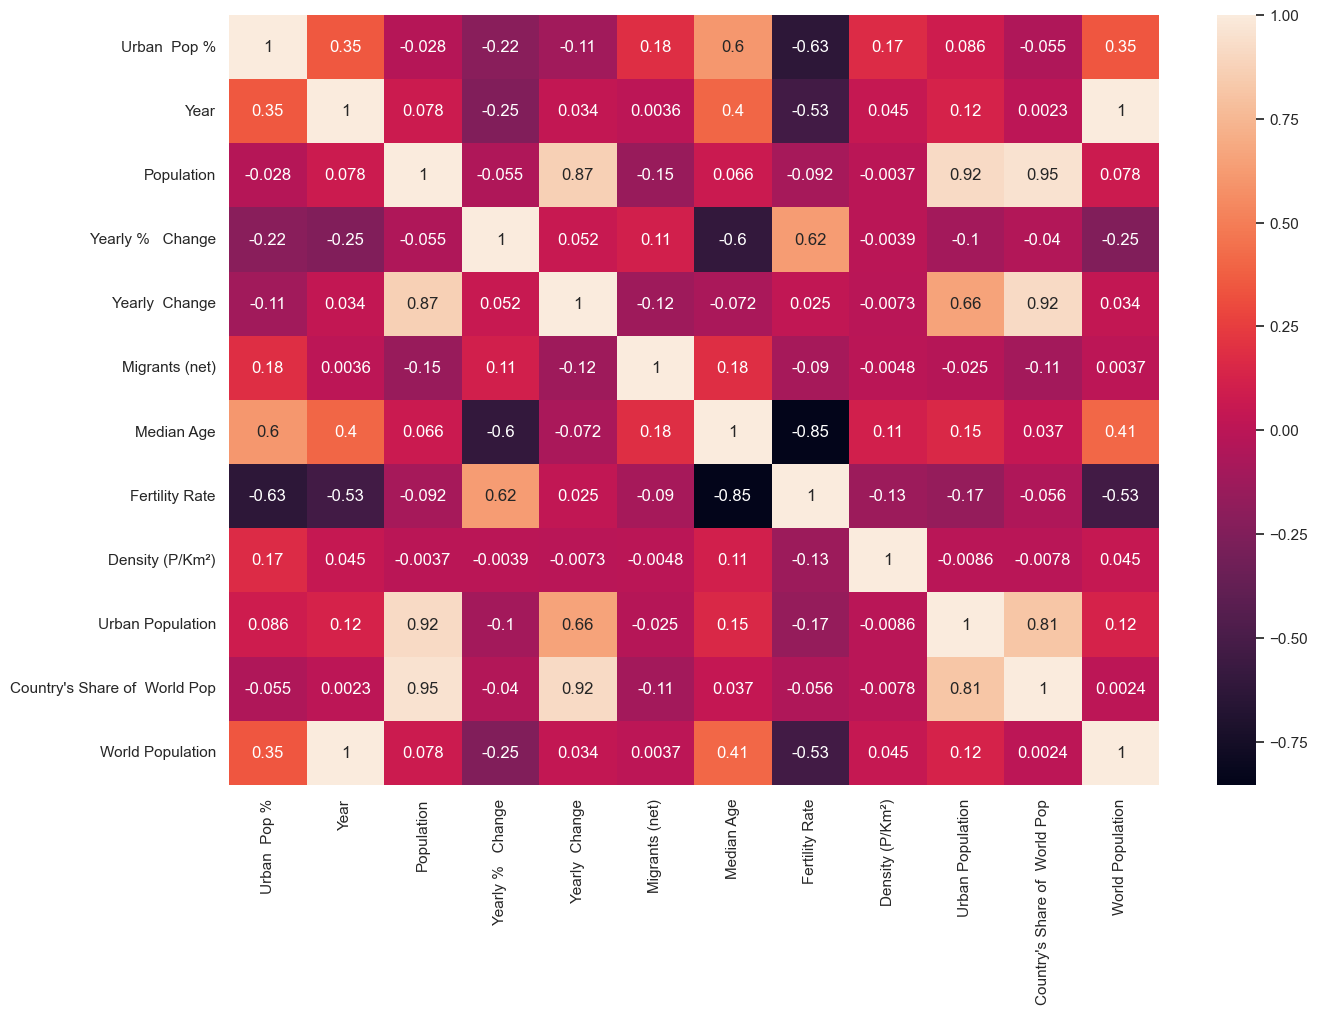

In [15]:
mapa_calor(base_population['Year'],base_population['Population'],base_population['Fertility Rate'])

### Definicao de funcoes para a analise de outliers


- Definicao de algumas funcoes para ajudar na analise de outliers

In [16]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

def excluir_outliers(df, nome_coluna):
    qtdelinhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = base_population.loc[(base_population[nome_coluna] >= lim_inf) & (base_population[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [17]:
print(limites(base_population['Fertility Rate']))
base_population['Fertility Rate'].describe()

(-3.431249999999999, 11.318749999999998)


count    3570.000000
mean        3.916378
std         1.981127
min         0.850000
25%         2.100000
50%         3.440000
75%         5.787500
max         8.800000
Name: Fertility Rate, dtype: float64

In [18]:
def diagrama_caixa(coluna):
    fig, (ax1,ax2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

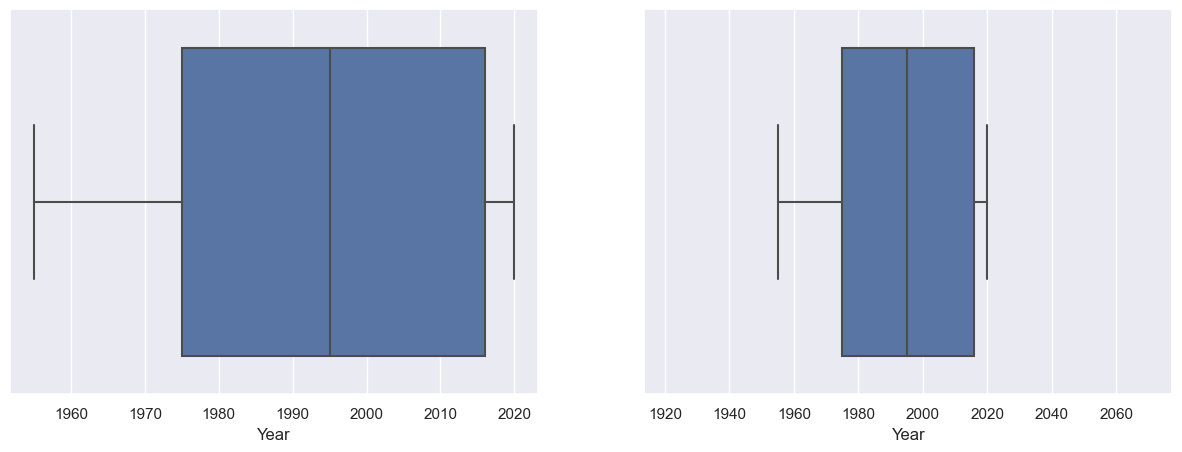

In [19]:
diagrama_caixa(base_population['Year'])

### Modelo de Previsao

- Metricas de avaliacao

In [20]:
def avaliar_modelo(nome_modelo, y_test, previsao):
    r2 = r2_score(y_test, previsao)
    RSME = np.sqrt(mean_squared_error(y_test, previsao))
    return f'Modelo {nome_modelo}:\R2:{r2:.2%}\RSME{RSME:.2f}'

- Modelos a serem testados:
 1. Radom Forest
 2. Linear Regressionm
 3. Extra Tree

In [21]:
modelos = {'RadomForest': RandomForestRegressor(),
          'LinearRegression': LinearRegression(),
          'ExtraTree': ExtraTreesRegressor()}

y = base_population['Fertility Rate']
x = base_population.drop('Fertility Rate', axis=1)

- Separar os dados em treino e teste + Treino do Modelo

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 10)

for nome_modelo, modelo in modelos.items():
    #Treinar
    modelo.fit(x_train, y_train)
    #Testar
    previsao = modelo.predict(x_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

Modelo RadomForest:\R2:95.48%\RSME0.42
Modelo LinearRegression:\R2:80.80%\RSME0.87
Modelo ExtraTree:\R2:95.72%\RSME0.41


Modelo Escolhido como melhor modelo: ExtraTressRegressor.
Esse foi o modelo que apresentou o maior valor de R2 e ao mesmo tempo o menor valor do RSME. Como nao tivemos uma grande diferenca de velocidadede treino e de previsao desse modelo com o modelo de RandomForest (que teve os ressultados proximos de R2 E RSME, vamos escolher o modelo ExtraTrees).

O modelo de reressao linear obteve um resultado satisfatorio, porem os valores de R2 e RSME foram inferiores ao outros dois modelos.

Resultados das Metricas de avalicao no Modelo Vencedor:
Modelo ExtraTree:
R2:95.66%
RSME0.41

### Ajustes e Melhorias no Melhor Modelo

In [23]:
print(modelos['RadomForest'].feature_importances_)
print(x_train.columns)

importancia_features = pd.DataFrame(modelos['RadomForest'].feature_importances_, x_train.columns)
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)

[0.0154648  0.03192145 0.00462449 0.02743976 0.00486025 0.00683917
 0.85712982 0.01122691 0.00517708 0.00300197 0.03231431]
Index(['Urban  Pop %', 'Year', 'Population', 'Yearly %   Change',
       'Yearly  Change', 'Migrants (net)', 'Median Age', 'Density (P/Km²)',
       'Urban Population', 'Country's Share of  World Pop',
       'World Population'],
      dtype='object')


,0
Median Age,0.857130
World Population,0.032314
Year,0.031921
Yearly % Change,0.027440
Urban Pop %,0.015465
Density (P/Km²),0.011227
Migrants (net),0.006839
Urban Population,0.005177
Yearly Change,0.004860
Population,0.004624


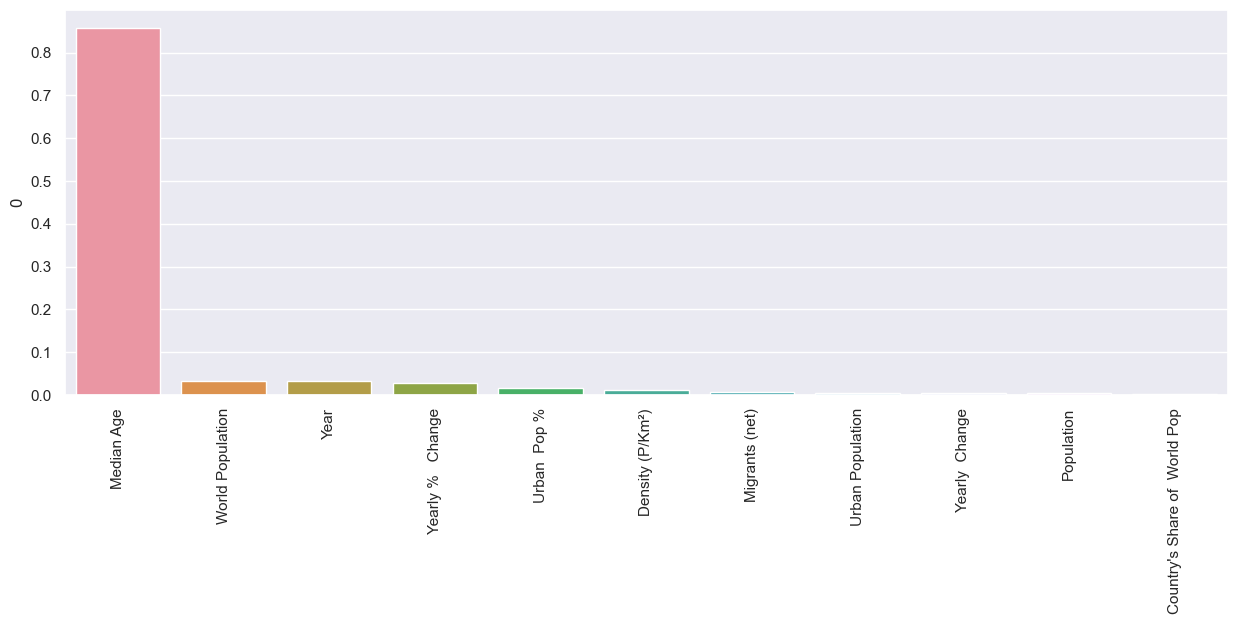

In [24]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])  
ax.tick_params(axis='x', rotation=90)